<a href="https://colab.research.google.com/github/singhmousam/DocumentClassificationUsingOCR/blob/master/IncrementalLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import pickle
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from sklearn.preprocessing import LabelBinarizer
import sklearn.datasets as skds
from pathlib import Path
from keras.models import load_model
import os

Using TensorFlow backend.


In [0]:
data = pd.read_csv('bbc-text.csv')


In [4]:
data.sample(5, random_state=0)

,category,text
384,politics,drive to save festive holidays efforts are b...
1983,sport,officials respond in court row australian tenn...
985,sport,cup holders man utd visit everton holders manc...
1386,sport,adriano s chelsea link rejected adriano s agen...
1294,sport,o driscoll/gregan lead aid stars ireland s bri...


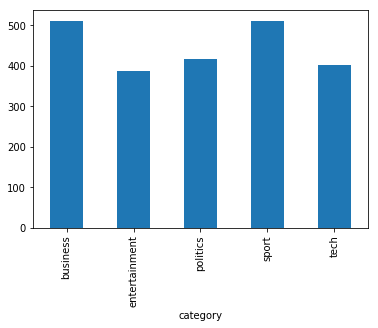

In [6]:
data.groupby('category').text.count().plot.bar(ylim=0)

In [0]:
# dividing whole data into sets
set1 = data[0:500]
set2 = data[500:1000]
set3 = data[1000:]

In [0]:
# Training on set 1
text_1 = set1['text']
tags_1 = set1['category']

In [0]:
num_labels = 5
vocab_size = 50000
batch_size = 100
 
# define Tokenizer with Vocab Size
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(text_1)
 
x_train_1 = tokenizer.texts_to_matrix(text_1, mode='tfidf')
 
encoder = LabelBinarizer()
encoder.fit(tags_1)

y_train_1 = encoder.transform(tags_1)

In [10]:
# model definition
model1 = Sequential()
model1.add(Dense(512, input_shape=(vocab_size,)))
model1.add(Activation('relu'))
model1.add(Dropout(0.3))
model1.add(Dense(512))
model1.add(Activation('relu'))
model1.add(Dropout(0.3))
model1.add(Dense(num_labels))
model1.add(Activation('softmax'))
model1.summary()
 
model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
history = model1.fit(x_train_1, y_train_1,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_split=0.1)

W0725 10:02:34.255297 140187916941184 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0725 10:02:34.303865 140187916941184 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0725 10:02:34.311178 140187916941184 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0725 10:02:34.334784 140187916941184 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0725 10:02:34.347343 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               25600512  
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 2565      
__________

In [12]:
# Testing on set 1
text_labels = encoder.classes_
count = 0
for i in range(500):
    prediction = model1.predict(np.array([x_train_1[i]]))
    predicted_label = text_labels[np.argmax(prediction[0])]
    if tags_1.iloc[i] != predicted_label:
        count+=1
        #print('Actual label:' + tags_1.iloc[i])
        #print("Predicted label: " + predicted_label)
count

3